In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('C:\\Users\\arvin\\Downloads/insurance.csv')

In [5]:
# creating first 6 rows DataFrame
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# number of rows and colmn
insurance_dataset.shape

(1338, 7)

In [8]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
insurance_dataset.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [10]:
# getting some information about the datasets
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Figure size 700x700 with 0 Axes>

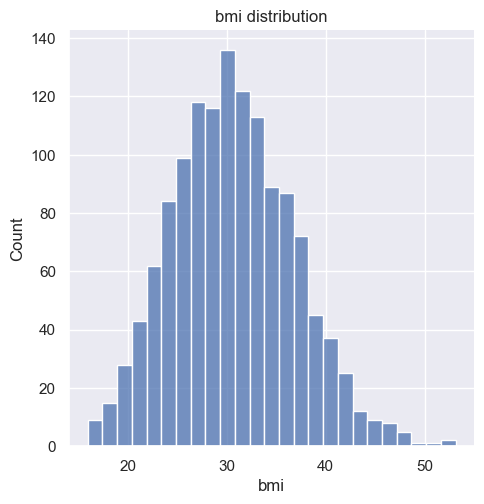

In [11]:
# destribution of bmi value
sns.set()
plt.figure(figsize=(7,7))
sns.displot(insurance_dataset['bmi'])
plt.title('bmi distribution')
plt.show()

<Figure size 800x800 with 0 Axes>

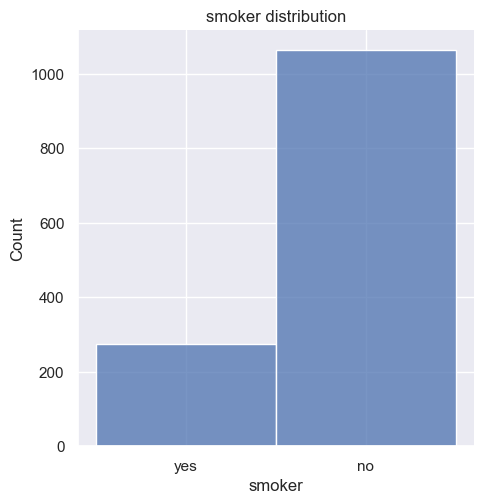

In [12]:
# distribution of smoker value
sns.set()
plt.figure(figsize=(8,8))
sns.displot(insurance_dataset['smoker'])
plt.title('smoker distribution')
plt.show()
           

<Figure size 800x900 with 0 Axes>

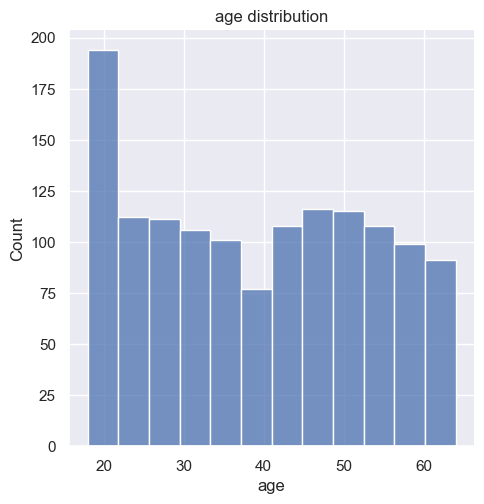

In [13]:
# distribution of age value
sns.set()
plt.figure(figsize=(8,9))
sns.displot(insurance_dataset['age'])
plt.title('age distribution')
plt.show()

<AxesSubplot:xlabel='sex', ylabel='count'>

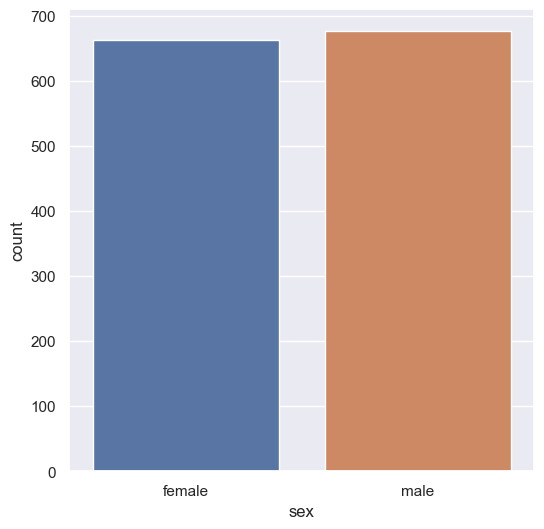

In [14]:
# gender colmn
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)

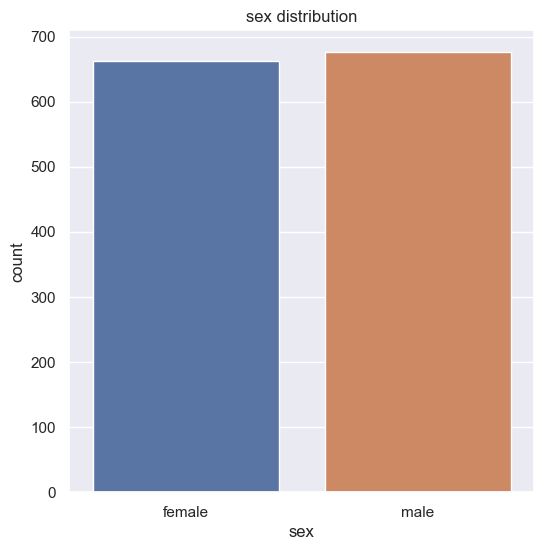

In [15]:
# gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('sex distribution')
plt.show()

In [16]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [17]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [18]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

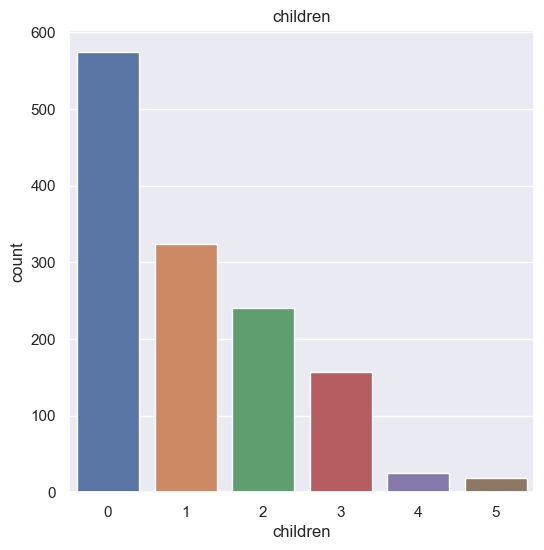

In [19]:
# children colmn
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset)
plt.title('children')
plt.show()

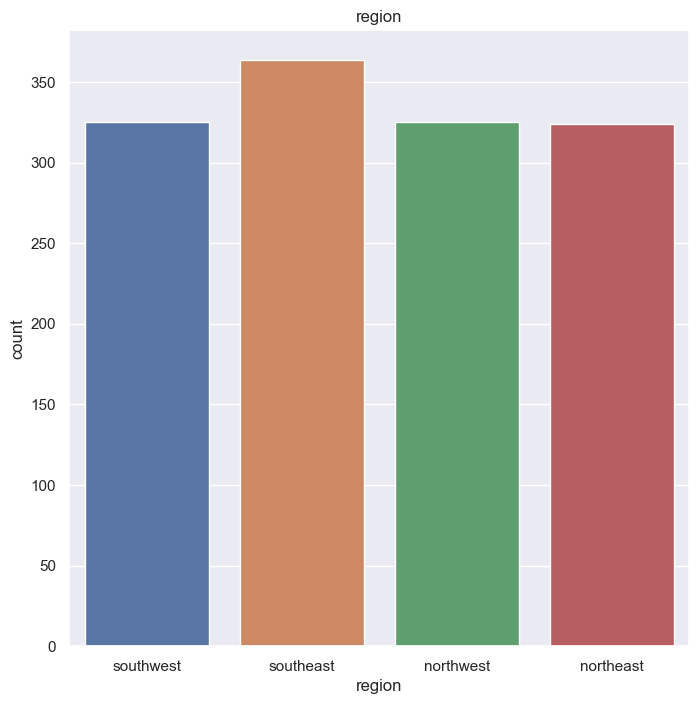

In [20]:
# region column
plt.figure(figsize=(8,8))
sns.countplot(x='region',data=insurance_dataset)
plt.title('region')
plt.show()

In [21]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

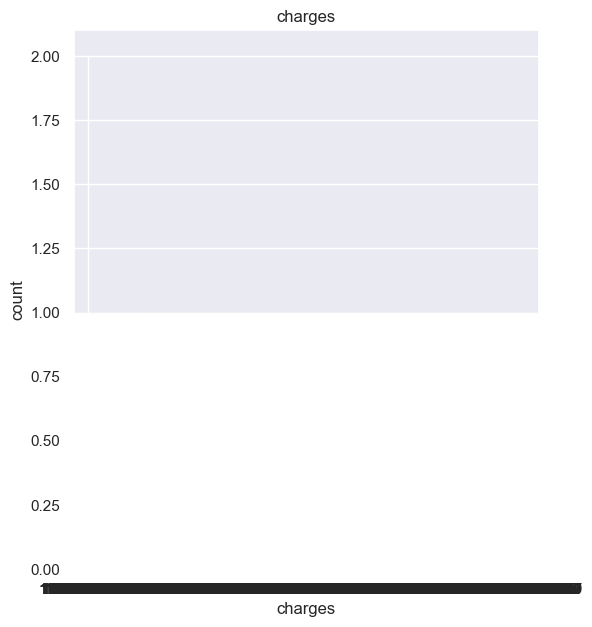

In [22]:
# charges column
plt.figure(figsize=(6,7))
sns.countplot(x='charges',data=insurance_dataset)
plt.title('charges')
plt.show()

In [23]:
insurance_dataset['charges'].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

C:\Users\arvin\anaconda3\e drive\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


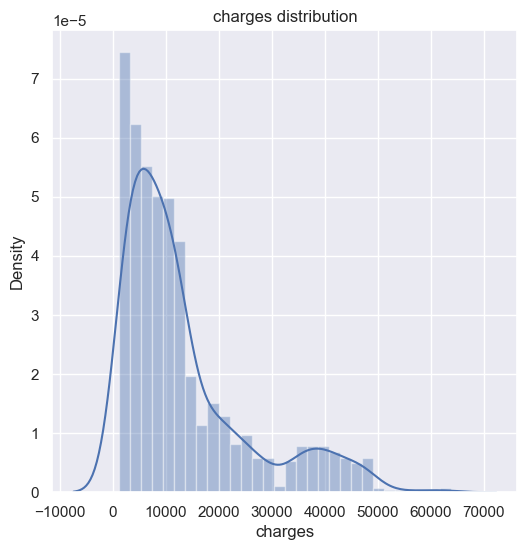

In [24]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset[('charges')])
plt.title('charges distribution')
plt.show()

# Data pre-processing
## Encoding the categoriacal feature

In [25]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

spillit the feature  and target

In [26]:
x=insurance_dataset.drop(columns='children',axis=1)
y=insurance_dataset['children']


In [27]:
print(x)

      age  sex     bmi  smoker  region      charges
0      19    1  27.900       0       1  16884.92400
1      18    0  33.770       1       0   1725.55230
2      28    0  33.000       1       0   4449.46200
3      33    0  22.705       1       3  21984.47061
4      32    0  28.880       1       3   3866.85520
...   ...  ...     ...     ...     ...          ...
1333   50    0  30.970       1       3  10600.54830
1334   18    1  31.920       1       2   2205.98080
1335   18    1  36.850       1       0   1629.83350
1336   21    1  25.800       1       1   2007.94500
1337   61    1  29.070       0       3  29141.36030

[1338 rows x 6 columns]


In [28]:
print(y)

0       0
1       1
2       3
3       0
4       0
       ..
1333    3
1334    0
1335    0
1336    0
1337    0
Name: children, Length: 1338, dtype: int64


In [29]:
x=insurance_dataset.drop(columns='charges',axis=1)
y=insurance_dataset['charges']


In [30]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [31]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


spilt the data into training data and testing 

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

print(x.describe, x_train.describe, x_test.describe)

<bound method NDFrame.describe of       age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]> <bound method NDFrame.describe of       age  sex     bmi  children  smoker  region
882    21    1  22.135         0       1       2
505    37    0  30.875         3       1       3
798    58    1  33.100         0       1       1
792    22    1  23.180         0       1       2
201    48    1  32.230         1       1       0
...   ...  ...     ...  

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)
